In [1]:
import numpy as np
import csv as csv
import json    
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import biosppy.signals.resp as resp
# Returns
#    -------
#    ts : array
#        Signal time axis reference (seconds).
#    filtered : array
#        Filtered Respiration signal.
#    zeros : array
#        Indices of Respiration zero crossings.
#    resp_rate_ts : array
#        Respiration rate time axis reference (seconds).
#    resp_rate : array
#        Instantaneous respiration rate (Hz).

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

### Read header

In [3]:
fname = '../riot_rip_acquisition/ak/opensignals_192.168.1.1008888_2020-02-05_11-54-42.txt'
with open(fname) as datafile:
    readdata = csv.reader(datafile, delimiter='\t')
    header = [next(readdata), next(readdata), next(readdata)]
    header_json = json.loads(header[1][0][1:])
print(header_json)

{'192.168.1.100:8888': {'sensor': ['RIOT', 'RIOT', 'RIOT', 'RIOT', 'RIOT'], 'device name': '192.168.1.100:8888', 'column': ['nSeq', 'DI', 'ACCx', 'ACCy', 'ACCz', 'ANALOG1', 'ANALOG2'], 'sync interval': 2, 'time': '11:54:43.221', 'comments': '', 'device connection': '192.168.1.100:8888', 'channels': [1, 2, 3, 13, 14], 'keywords': '', 'convertedValues': 0, 'mode': 0, 'digital IO': [0, 1], 'firmware version': 'riot', 'device': 'riot', 'position': 0, 'sampling rate': 200, 'label': ['ACCx', 'ACCy', 'ACCz', 'ANALOG1', 'ANALOG2'], 'resolution': [1, 1, 1, 1, 1], 'date': '2020-2-5', 'special': [{}, {}, {}, {}, {}]}}


In [4]:
len(header)

3

### Read data

In [5]:
data = np.genfromtxt(fname)
print(data.shape)

(48150, 7)


### Process

In [6]:
col_num  = 5
ripdata = data[:,col_num]

In [7]:
ripdata

array([2321., 2317., 2322., ..., 2238., 2239., 2235.])

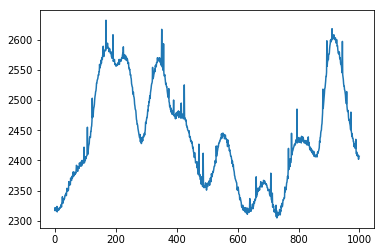

In [8]:
plt.plot(ripdata[:1000])

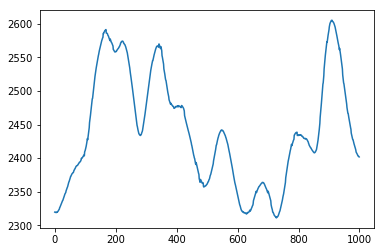

In [9]:
plt.plot(moving_average(ripdata,10)[:1000])

In [10]:
len(ripdata)

48150

In [11]:
len(moving_average(ripdata,10))

48141

In [12]:
rd = ripdata[:1000]
rds = moving_average(rd,10)

In [13]:
rds_diff = np.diff(rds)
rds_diff > 0

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

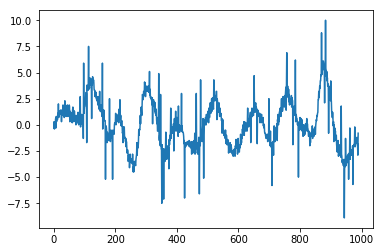

In [14]:
plt.plot(rds_diff)
#plt.plot(rds)

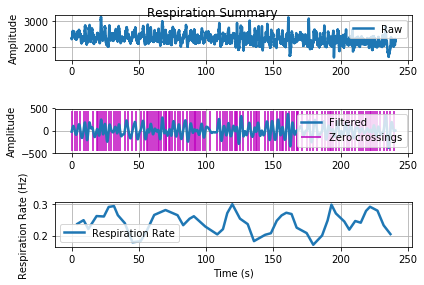

In [28]:
a = resp.resp(signal=ripdata, sampling_rate=200., show=True)

In [33]:
a

ReturnTuple(ts=array([0.00000000e+00, 4.99989616e-03, 9.99979232e-03, ...,
       2.40730000e+02, 2.40735000e+02, 2.40740000e+02]), filtered=array([-2.64725789e+01, -2.59247636e+01, -2.53734579e+01, ...,
       -3.40874268e-02, -2.85413911e-02, -2.36186601e-02]), zeros=array([   43,   457,   848,  1302,  1777,  2126,  2481,  3192,  3709,
        3899,  4210,  4579,  4798,  5090,  5512,  5903,  6297,  6643,
        6871,  7203,  7911,  8432,  9035,  9614, 10246, 10799, 11241,
       11383, 11584, 11957, 12278, 12547, 12787, 12922, 13310, 13710,
       13958, 14015, 14486, 14644, 14947, 15374, 15752, 16101, 16591,
       17104, 17532, 17928, 18176, 18373, 18559, 18727, 19123, 19500,
       19885, 20572, 21658, 22099, 22507, 22827, 23146, 23500, 23894,
       24286, 24410, 24654, 25033, 25431, 26183, 26618, 27114, 27363,
       27509, 27902, 28781, 29248, 29633, 30014, 30502, 30929, 31223,
       31468, 31922, 32346, 32704, 33030, 33459, 33553, 33657, 34277,
       34948, 35425, 35930, 36

In [34]:
a[4]

array([0.23739322, 0.24927446, 0.22074754, 0.26236447, 0.26103818,
       0.29167506, 0.29444039, 0.26517227, 0.23955856, 0.17846547,
       0.18136458, 0.21811408, 0.26594381, 0.28175787, 0.26515607,
       0.23312203, 0.25382596, 0.26185535, 0.22860979, 0.20361387,
       0.22045449, 0.27197999, 0.30046534, 0.25410667, 0.2365877 ,
       0.18198951, 0.20226575, 0.2073747 , 0.24742796, 0.26455505,
       0.27309001, 0.26892606, 0.22519127, 0.20782844, 0.17026389,
       0.20002441, 0.24827977, 0.29901543, 0.27082099, 0.24501121,
       0.21878442, 0.24648493, 0.24107638, 0.27901803, 0.29227384,
       0.27981192, 0.23263233, 0.20447697])

In [85]:
step = 3000
b = []
for i in range(4):
    b.append(resp.resp(signal=ripdata[i*step:(i+1)*step], sampling_rate=200., show=False)[4])
    print(i,i*step,((i+1)*step) )

0 0 3000
1 3000 6000
2 6000 9000
3 9000 12000


In [86]:
b = [item for sublist in b for item in sublist]
b


[0.2382531112283883,
 0.24676157715198227,
 0.2552700430755762,
 0.25773195876288657,
 0.30349013657056145,
 0.18501387604070307,
 0.19212295869356388,
 0.16129032258064516,
 0.21052631578947367]

In [61]:
len(ripdata)

48150

In [43]:
a[4]

array([0.23739322, 0.24927446, 0.22074754, 0.26236447, 0.26103818,
       0.29167506, 0.29444039, 0.26517227, 0.23955856, 0.17846547,
       0.18136458, 0.21811408, 0.26594381, 0.28175787, 0.26515607,
       0.23312203, 0.25382596, 0.26185535, 0.22860979, 0.20361387,
       0.22045449, 0.27197999, 0.30046534, 0.25410667, 0.2365877 ,
       0.18198951, 0.20226575, 0.2073747 , 0.24742796, 0.26455505,
       0.27309001, 0.26892606, 0.22519127, 0.20782844, 0.17026389,
       0.20002441, 0.24827977, 0.29901543, 0.27082099, 0.24501121,
       0.21878442, 0.24648493, 0.24107638, 0.27901803, 0.29227384,
       0.27981192, 0.23263233, 0.20447697])

In [49]:
a[3].shape

(48,)

In [52]:
len(a[2])/4

30.5

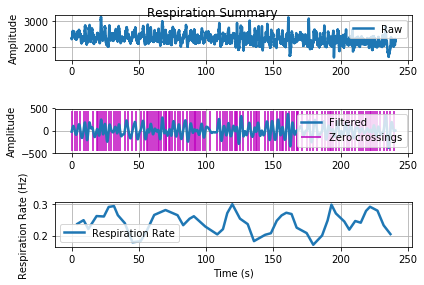

In [97]:
a = resp.resp(signal=ripdata, sampling_rate=200., show=True)

In [96]:
len(a[4])

23

In [94]:
len(ripdata)/200

240.75

In [98]:
a_diff = np.diff(a[1])
a_diff > 0

array([ True,  True,  True, ...,  True,  True,  True])

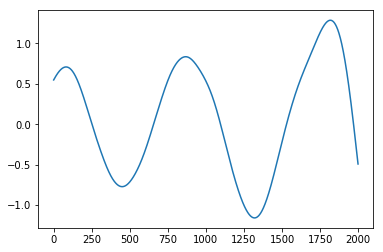

In [100]:
plt.plot(a_diff[:2000])